In this notebook, let's quickly explore our sets of image

In [1]:
import os
from PIL import Image
from IPython.display import display
from glob import glob

import pandas as pd

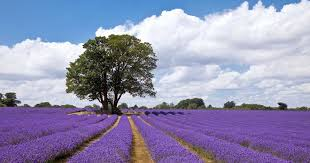

In [2]:
# Just to test our version of Pillow
with Image.open('./dataset/train/fields/1.jpg') as im:
    display(im)

### Create a list of image filenames

In [3]:
path = './dataset/'
images = {}

for folder in ["test_images/", "train/roads/", "train/fields/"]:
    folder_name = folder.split("/")[-2]
    images[folder_name] = list(glob(path + folder + "*.jpg")) + list(glob(path + folder + "*.jpeg"))
    print(f'{folder_name} images: ',len(images[folder_name]))

test_images images:  10
roads images:  110
fields images:  43


We have much more samples of roads than fields. We will have to rebalance that during model evaluation otherwise model accuracy will be biased (a dummy classifier that always predicts "road" would already have a 70% accuracy). If that's the actual distribution of images in our real world use case, we could also consider another performance metric (F1 Score, ROC AUC etc.)

### Create a DataFrame of image sizes (width x height)

In [4]:
img_sizes = []
for item in images["roads"] + images["fields"]:
    with Image.open(item) as img:
        img_sizes.append(img.size)
        
df = pd.DataFrame(img_sizes)

df['aspect_ratio'] = df[0] / df[1]

df.describe()

,0,1,aspect_ratio
count,153.000000,153.000000,153.000000
mean,655.882353,572.392157,1.508542
std,569.662122,703.715218,0.435954
min,183.000000,118.000000,0.562390
25%,275.000000,172.000000,1.394737
50%,300.000000,188.000000,1.502732
75%,1600.000000,1011.000000,1.769231
max,1600.000000,2845.000000,3.610169


In our dataset, most images have an aspect ratio of 1.5 or more.
In most computer vision projects, images are squared in the preprocessing step for practical purposes, but in our case the horizontal dimension may be important because we are tracking long objects. And the cropping step may hide important parts of our images: for instance, the sides of close-up roads pictures may be the most relevant due to perspective.

Therefore, for our model let's try a size of 200 x 300 without cropping.

### Image display

Given, the relatively small size of our training dataset, let's explore it fully to make sure that all images were correctly labeled.

In [ ]:
for image in images["roads"]:
    with Image.open(image) as im:
        print(image)
        display(im)

In [ ]:
for image in images["fields"]:
    with Image.open(image) as im:
        print(image)
        display(im)

It appears that following pictures were wrongly labeled as "fields":
* ./dataset/fields/5.jpg
* ./dataset/fields/3.jpg

Let's move them to the "roads" directory.